# Simple LP problem using Plasmo.jl

In [46]:
using Plasmo, GLPK, PlasmoPlots

In [47]:
function simple_optigraph()
    graph = Plasmo.OptiGraph()

    # create three nodes
    Plasmo.@optinode(graph, n1)
    Plasmo.@variable(n1, y >= 2)
    Plasmo.@variable(n1, x >= 0)
    Plasmo.@constraint(n1, x + y >= 3)
    Plasmo.@objective(n1, Min, y)

    Plasmo.@optinode(graph, n2)
    Plasmo.@variable(n2, y)
    Plasmo.@variable(n2, x >= 0)
    Plasmo.@constraint(n2, x + y >= 3)
    Plasmo.@objective(n2, Min, y)

    Plasmo.@optinode(graph, n3)
    Plasmo.@variable(n3, y)
    Plasmo.@variable(n3, x >= 0)
    Plasmo.@constraint(n3, x + y >= 3)
    Plasmo.@objective(n3, Min, y)

    # create a link constraint between nodes (automatically creates an optiedge)
    Plasmo.@linkconstraint(graph, n1[:x] + n2[:x] + n3[:x] == 3) # n1[:x] syntax means reading the key which is the variable x of node n1.
    return graph
end

simple_optigraph (generic function with 1 method)

In [48]:
graph = simple_optigraph()

# optimize with GLPK
JuMP.set_optimizer(graph, GLPK.Optimizer)
JuMP.optimize!(graph)

In [49]:
# Query solution
n1,n2,n3 = Plasmo.optinodes(graph) 

## We can check in below code lines that JuMP also work in Plasmo.jl for both OptiNode and OptiGraph objects without any syntax changes.
println("n1[:x]: ", JuMP.value(n1[:x]))
println("n1[:y]: ", JuMP.value(n2[:y]))
println("")
println("n2[:x]: ", JuMP.value(n3[:x]))
println("n2[:y]: ", JuMP.value(n1[:y]))
println("")
println("n3[:x]: ", JuMP.value(n2[:x]))
println("n3[:y]: ", JuMP.value(n3[:y]))
println("")
println("Obj. value: ", JuMP.objective_value(graph))

n1[:x]: 1.0
n1[:y]: 1.0

n2[:x]: 0.0
n2[:y]: 2.0

n3[:x]: 2.0
n3[:y]: 3.0

Obj. value: 6.0


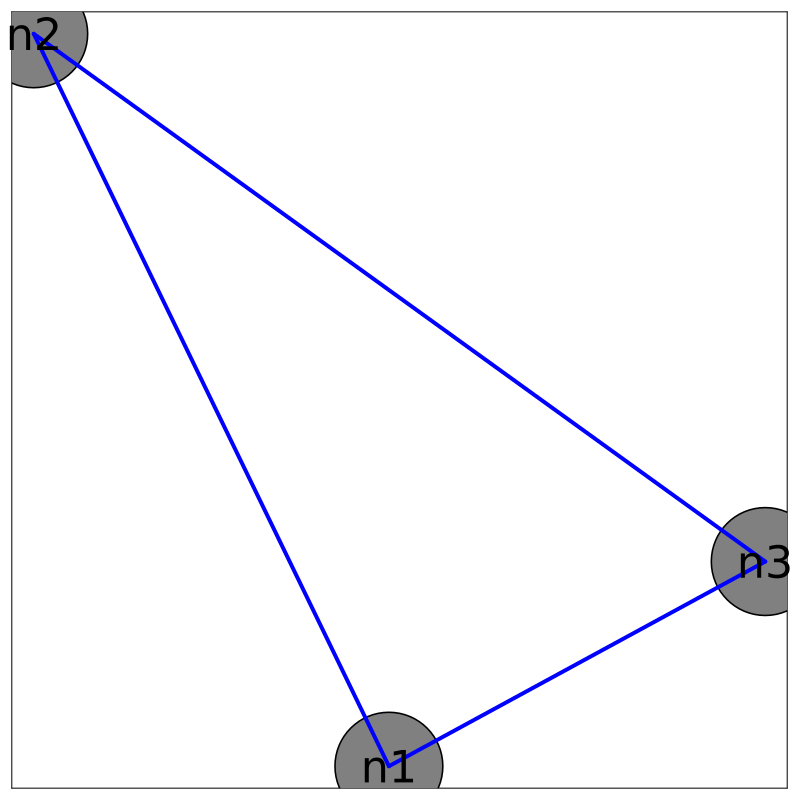

In [50]:
# visualize graph topology
plt_graph = PlasmoPlots.layout_plot(graph, node_labels=true, markersize=60, labelsize=30, linewidth=4, layout_options=Dict(:tol => 0.01, :iterations => 2))

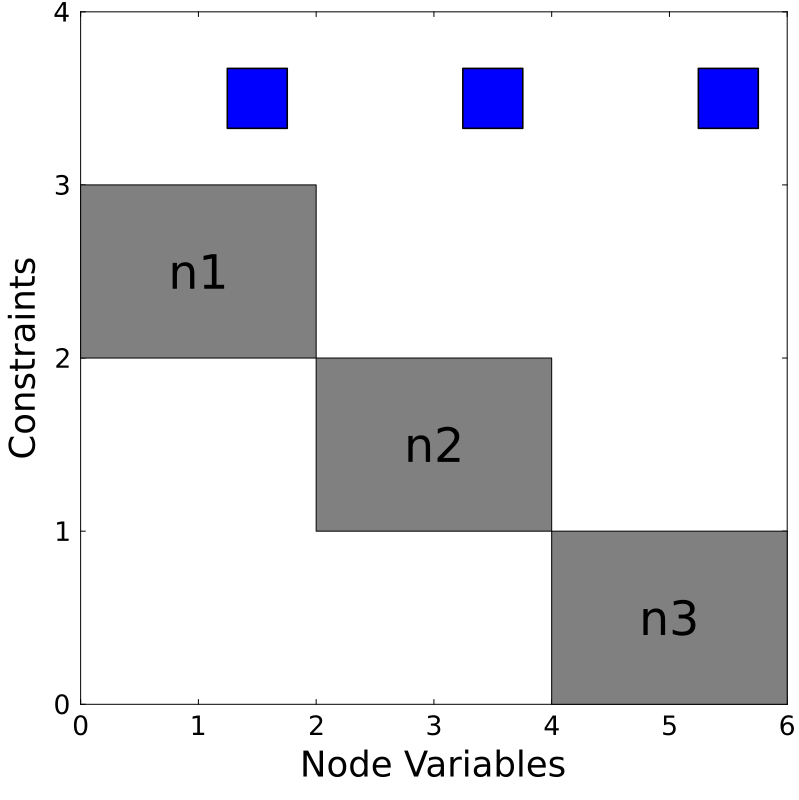

In [51]:
# visualize graph adjacency
plt_matrix = PlasmoPlots.matrix_plot(graph, node_labels=true, markersize=30, labelsize=32)

In [ ]:
# Plots.savefig(plt_graph,"figures/example1_layout.pdf")
# Plots.savefig(plt_matrix,"figures/example1_matrix.pdf")